In [52]:
import numpy as np
import random
import statistics
import matplotlib.pyplot as plt
import pylab
from matplotlib.image import NonUniformImage

In [2]:
#Exercise-1: Predict the value of Pi for a single-run

#Define a function, that is a 1x1 square that randomly draws a number between
#these values and then take the ratio of the throws inside a circle to the
#total number of throws.

ntrials = 10000
nhits = 0

for i in range(ntrials):
    x,y = random.uniform(-1.0,1.0), random.uniform(-1.0,1.0)
    
    if x**2 + y**2 < 1.0:
        nhits += 1.0
print(4*(nhits/float(ntrials)))

3.1448


In [3]:
#Make it so you can run many-trials

def pi(N):
    nhits = 0
    for i in range(N):
        x,y = random.uniform(-1.0,1.0), random.uniform(-1.0,1.0)
        if x**2 + y**2 < 1.0:
            nhits += 1.0
    return nhits

nruns = 5000
ntrials = 4000

#store the data into an array, to plot to see the convergence
x = []
for j in range(nruns):
    x.append(4.0*(pi(ntrials)/float(ntrials)))
    #print(x)

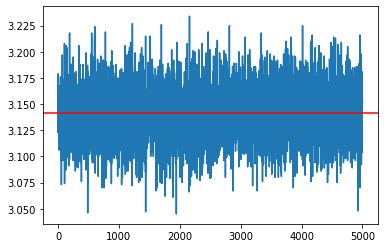

In [4]:
plt.plot(x)
plt.axhline(y=np.pi, color='r', linestyle='-')
plt.show()

In [15]:
#Part-2 Markov sampling 
"""What this program is doing is initializing the point of the sample, (x,y)
and then randomly moving is according to a uniform sampling within the area of a 
square. If the small delta x,y and its initial position sit outside the radius of
a small circle then we just keep the sample in that spot until we get a 
point back inside the system. """
x, y = 1.0, 1.0
delta = 0.1
n_trials = 5000
n_hits = 0
for i in range(n_trials):
    del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
    if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
        x, y = x + del_x, y + del_y
    if x**2 + y**2 < 1.0: n_hits += 1
print(4.0 * n_hits / float(n_trials))

#multi-run

def ms(N, delta):
    x,y = 1.0,1.0
    n_hits = 0
    for i in range(n_trials):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if x**2 + y**2 < 1.0: n_hits += 1
    
    return n_hits

#take into account all runs and average over them
nruns = 1000
n_trials = 4000
delta = 0.1

y= []
for j in range(nruns):
    y.append(4.0 * ms(n_trials,delta) / float(n_trials))
    #print(y)    

3.2416


In [35]:
#simulating the pebble-game 
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
t_max = 4
site = 8
t = 0
#print(neighbor[site])

while t < t_max:
    t += 1
    site = neighbor[site][random.randint(0, 3)]
    print(1)
    


1
1
1
1


In [45]:
#non-constant weights

#initalize an empty-variable for histogram
histo = [0, 0, 0, 0, 0, 0, 0, 0, 0]

#initialize the lattice
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]

#assign non-equal weights to each cell; should be done randomly for improvement
weight = [3.0, 0.5, 1.0, 0.5, 1.0, 0.5, 2.0, 0.5, 1.0]

#initialize the position to start on grid
pos = 8
n_iter = 1000000
for iter in range(n_iter):
    new_pos = neighbor[pos][random.randint(0, 3)]
    """ draw random number between 0 and 1 and accept if the ratio of the weights
        is larger."""
    
    if random.random() < weight[new_pos] / weight[pos]:
        pos = new_pos
    histo[pos] += 1 

norm = sum(weight)
print('comparison:  weight, histogram')
for k in range(9): 
    print('site: ', k,' weight: ', weight[k], ' histo: ', norm * histo[k] / float(n_iter))

comparison:  weight, histogram
site:  0  weight:  3.0  histo:  2.98412
site:  1  weight:  0.5  histo:  0.49965
site:  2  weight:  1.0  histo:  0.99926
site:  3  weight:  0.5  histo:  0.5022
site:  4  weight:  1.0  histo:  1.00151
site:  5  weight:  0.5  histo:  0.5011
site:  6  weight:  2.0  histo:  2.01257
site:  7  weight:  0.5  histo:  0.49757
site:  8  weight:  1.0  histo:  1.00202


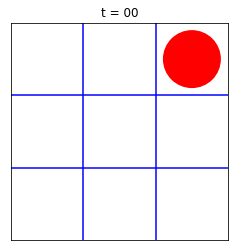

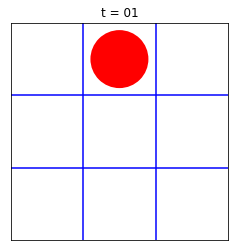

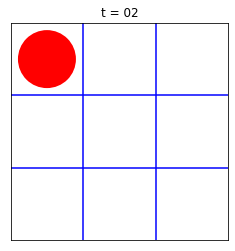

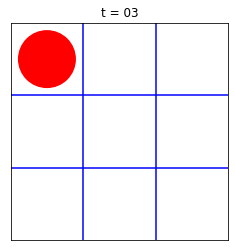

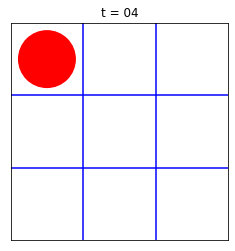

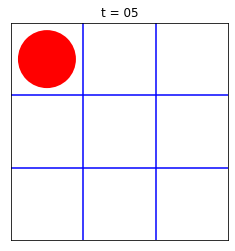

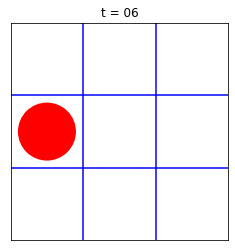

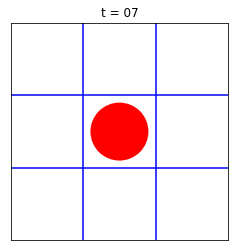

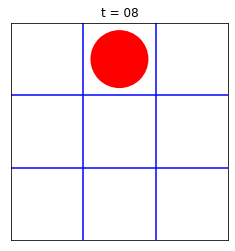

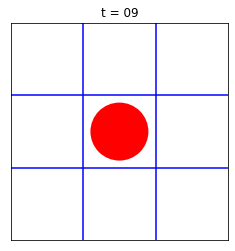

<Figure size 432x288 with 0 Axes>

In [48]:
sigma = 0.4  # sigma and s_map are needed for the graphical output

s_map = [(1.0, 1.0), (2.0, 1.0), (3.0, 1.0), 
         (1.0, 2.0), (2.0, 2.0), (3.0, 2.0), 
         (1.0, 3.0), (2.0, 3.0), (3.0, 3.0)] 

neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
site = 8
N_runs = 10
for run in range(N_runs):
    if run < 10: number_string = '0'+str(run)
    else: number_string = str(run)
    # Begin of graphical output
    cir = pylab.Circle(s_map[site], radius=sigma, fc='r')
    pylab.gca().add_patch(cir)
    pylab.plot([0.5, 3.5], [1.5, 1.5], 'b')
    pylab.plot([0.5, 3.5], [2.5, 2.5], 'b')
    pylab.plot([1.5, 1.5], [0.5, 3.5], 'b')
    pylab.plot([2.5, 2.5], [0.5, 3.5], 'b')
    pylab.title('t = '+ number_string)
    pylab.axis('scaled')
    pylab.axis([0.5, 3.5, 0.5, 3.5])
    pylab.xticks([])
    pylab.yticks([])
    #pylab.savefig('pebble_basic_movie_'+number_string+'.png', transparent=False)
    pylab.show()
    pylab.clf()
    # End of graphical output
    site = neighbor[site][ random.randint(0, 3)]

[[0.   0.   2.25]
 [0.   0.   0.  ]
 [0.   0.   0.  ]]
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]


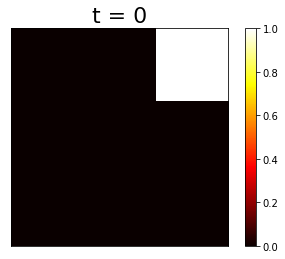

In [56]:
#Define two-dictionaries, where the first number is the key to the second.

xvec = {1:3, 2:2, 3:1, 4:3, 5:2, 6:1, 7:3, 8:2, 9:1} 
yvec = {1:1, 2:1, 3:1, 4:2, 5:2, 6:2, 7:3, 8:3, 9:3} 

#Define the pebble-grid as a dictionary as well

neighbor = {1 : [2, 4, 1, 1], 2 : [3, 5, 1, 2], 3 : [3, 6, 2, 3],
            4 : [5, 7, 4, 1], 5 : [6, 8, 4, 2], 6 : [6, 9, 5, 3],
            7 : [8, 7, 7, 4], 8 : [9, 8, 7, 5], 9 : [9, 9, 8, 6]}

list_vec = []
run = 0
if run < 10:  run_str= '0' + str(run)
else: run_str = str(run)
for n_runs in range(100000): 
    pos = 9
    for iter in range(run):
        pos = neighbor[pos][ random.randint(0, 3)]
    list_vec.append(pos)

x = [xvec[k] for k in list_vec]
y = [yvec[k] for k in list_vec]

plt.xticks([])
plt.yticks([])
H, xedges, yedges = np.histogram2d(x, y, bins=(3, 3), 
           range=[[1,3],[1,3]], normed=True)
print(H)
H /= np.sum(H)
print(H)
extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]
plt.imshow(H, extent=extent, interpolation='nearest', vmin=0.0, vmax=1.0)
plt.set_cmap('hot')
plt.colorbar()
plt.title('t = '+str(run),fontsize=22)
plt.savefig('3x3_pebble_run_'+run_str+'.png')
plt.show()

In [62]:
#Solving using the Transfer-Matrix approach:

"""This is important to understand for lattice type problems such as 
Ising Models, and optical lattices."""

neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]

#Initialize the transfer probability matrix to be a 9x9 matrix of zeros
transfer = np.zeros((9, 9))


for k in range(9):
    for neigh in range(4): transfer[neighbor[k][neigh], k] += 0.25

        
position = np.zeros(9)
position[8] = 1.0
for t in range(100):
    print(t,'  ',["%0.5f" % i for i in position])
    position = np.dot(transfer, position)



0    ['0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '1.00000']
1    ['0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.25000', '0.00000', '0.25000', '0.50000']
2    ['0.00000', '0.00000', '0.06250', '0.00000', '0.12500', '0.18750', '0.06250', '0.18750', '0.37500']
3    ['0.00000', '0.04688', '0.07812', '0.04688', '0.09375', '0.18750', '0.07812', '0.18750', '0.28125']
4    ['0.02344', '0.05469', '0.09766', '0.05469', '0.11719', '0.16016', '0.09766', '0.16016', '0.23438']
5    ['0.03906', '0.07324', '0.10254', '0.07324', '0.10742', '0.15234', '0.10254', '0.15234', '0.19727']
6    ['0.05615', '0.08057', '0.10767', '0.08057', '0.11279', '0.13989', '0.10767', '0.13989', '0.17480']
7    ['0.06836', '0.08929', '0.10895', '0.08929', '0.11023', '0.13379', '0.10895', '0.13379', '0.15735']
8    ['0.07883', '0.09421', '0.11024', '0.09421', '0.11154', '0.12758', '0.11024', '0.12758', '0.14557']
9    ['0.08652', '0.09871', '0.11057', '0.09871', '0.11

In [72]:
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
transfer = np.zeros((9, 9))
for k in range(9):
    for neigh in range(4): transfer[neighbor[k][neigh], k] += 0.25
eigenvalues, eigenvectors = np.linalg.eig(transfer)

for k in range(9):
        print('site: ', k,' eigen: ', eigenvalues[k])

site:  0  eigen:  -0.49999999999999956
site:  1  eigen:  -1.1792809590703096e-17
site:  2  eigen:  1.0000000000000009
site:  3  eigen:  0.7499999999999998
site:  4  eigen:  0.4999999999999998
site:  5  eigen:  0.2500000000000001
site:  6  eigen:  2.5245337753833646e-18
site:  7  eigen:  0.25000000000000017
site:  8  eigen:  0.7500000000000002
